In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

### Corners

In [3]:
def imshow(img, enlarge = True, color = True):
    if enlarge:
        plt.figure(figsize = (20,15));
    if not color:
        plt.imshow(img, cmap='gray');
    else:
        plt.imshow(img[:,:,::-1]);

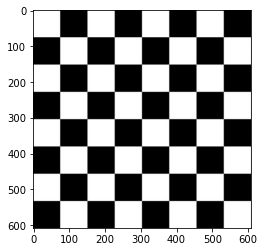

In [19]:
img = cv2.imread('img/chess.jpg')
plt.imshow(img);

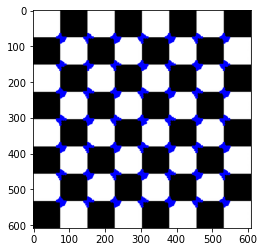

In [32]:
# We will work with the image above
# Convert it to grayscale

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


gray = np.float32(gray)

# Detect the corners using the cornerHarris

dst = cv2.cornerHarris(gray,2,3,0.04)
dst = cv2.dilate(dst,None)

img[dst>0.01*dst.max()]=[0,0,255]



# Display the image with the detected corners 

#cv2.imshow('dst',img)
#if cv2.waitKey(0) & 0xff == 27:
#    cv2.destroyAllWindows()
    
plt.imshow(img)

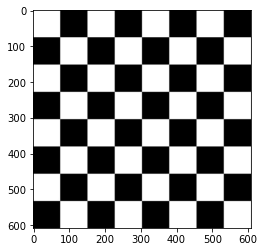

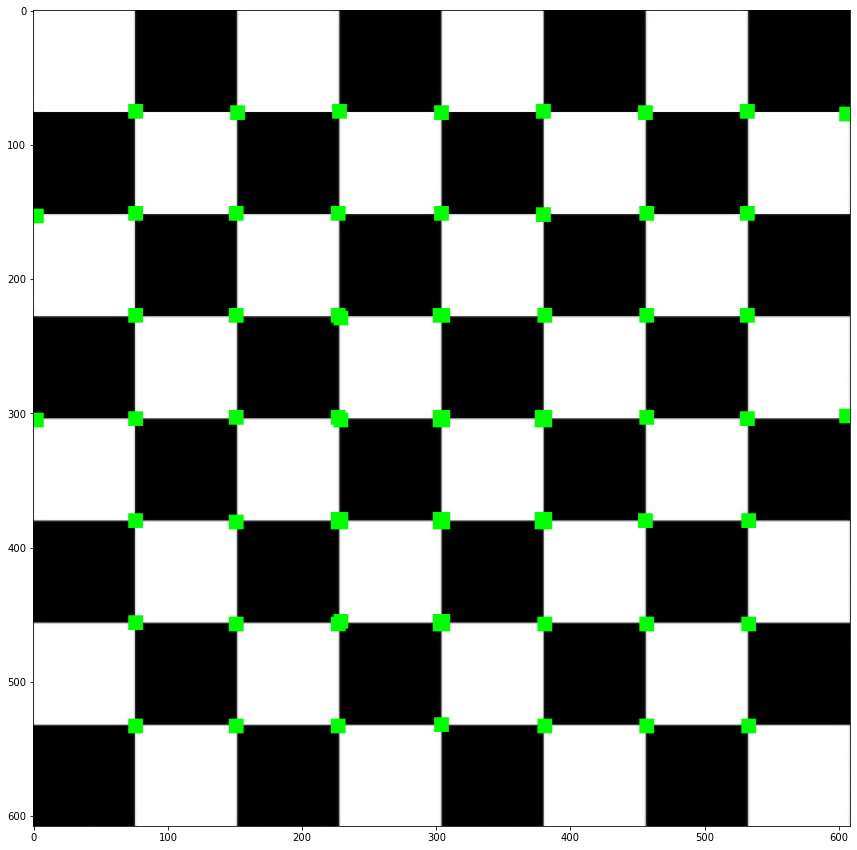

In [38]:
img = cv2.imread('img/chess.jpg')

# Convert img to grayscale

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')


gray = np.float32(gray)

# Detect the corners using goodFeaturesToTrack

chess_copy = img.copy()

max_corners = 100
quality = 0.01
distance = 1

corners = cv2.goodFeaturesToTrack(gray, max_corners, quality, distance)

for corner in corners:
    x,y = corner[0]
    x = int(x)
    y = int(y)
    cv2.rectangle(chess_copy, (x-5, y-5), (x+5, y+5), (0,255,0), -1)
# Draw the corners on top of img and show it on screen (make sure the corners are visible!)

imshow(chess_copy)
